# Misura Resistenza

Il programma controlla in tensione un canale specificato K con uno sweep da "start'' a ''stop'' e step di 'step', legge le rispettive tensioni e correnti insieme a quelle del secondo canale K2, le salva su file e le visualizza a video con grafici. 

## 1) Import

In [1]:
# Required imports
import sys
username = 'admin' # 'admin' for BO1 lab
sys.path.append('c:/users/'+ username +'/miniconda3/lib/site-packages')
import matplotlib.pyplot as plt
import qontrol
import os
import time
import datetime
import numpy as np
import math
import os.path

## 2) Dichiarazione variabili e setup driver

In [2]:
# Parameters initialization
K = 1 # the channel connected to the device [0,1,2 for left,centre and right thermistors]
K2 = 3
V = 3 # the Voltage to be applied to channel K
I = 0
start = 0
stop = 4
step = 0.25
max_current = 5
max_voltage = 7
measured_voltage = 0
measured_current = 0
averaged_voltage = 0
averaged_current = 0
averaged_voltage_list = []
averaged_current_list = []
derived_resistance_list = []
averaged_voltage_second_channel_list = []
averaged_current_second_channel_list = []
measured_voltage_second_channel = 0
measured_current_second_channel = 0
averaged_voltage_second_channel = 0
averaged_current_second_channel = 0
samples = 10 # number of measurements to be averaged
laser_wavelength = 697
laser_power = 5
amplifier_gain = 40

now = datetime.datetime.now()

# Configuration (Laser and Amplifier)
laser_wavelength = 697
laser_power = 5
amplifier_gain = 40

save_path = "G:/Shared drives/FMPS Archive/Projects/0_QPIXPAD/QPX4/Opt.Meas/20211013_Q3_+02_+08/Q8b/"  #'G:/My Drive/QPX/QPX3/2020_Dati_Misure_BO1/Q8b/' # WHERE TO SAVE DATA
file_name = 'Channel_' + str(K) + '_sweep_' + str(start) + '-' + str(stop) + '_step_' + str(step) + ".txt"
completeName = os.path.join(save_path, file_name)
timestamp = '%'+now.strftime("%d/%m/%Y %H:%M:%S")
configurazione = '\n%Laser Wavelength:' + str(laser_wavelength) + '[nm]\n%Laser Power:' +str(laser_power) + '[mW]\n%Amplifier Gain:' \
              + str(amplifier_gain) + '[dB]'
annotazione = '\n%Min Scattering Trans'
descrizione_esperimento = '\n%Swipe sulla tensione con onda sinusoidale su un canale, canali rimanenti a 0 V.Ciascun canale pilota una termoresistenza'
header = timestamp+configurazione+annotazione+descrizione_esperimento

# Open the log file
meas_file = open(completeName, "a")
meas_file.write(header)
meas_file.write("%Averaged_Voltage[V]\tAveraged_Current[mA]\tAveraged_Current-PD[mA]\n")


# Setup Qontroller
serial_port_name = "COM5" #"COM3" #"/dev/tty.usbserial-FT06QAZ5" # name of the USB Serial Port #//./COM11
q = qontrol.QXOutput(serial_port_name = serial_port_name, response_timeout = 0.1)

for channel in range(q.n_chs):
    #q.imax[channel] = max_current
    q.vmax[channel] = max_voltage
    

# Video Debugging
print ("Qontroller '{:}' initialised with firmware {:} and {:} channels".format(q.device_id, q.firmware, q.n_chs) )

Qontroller 'Q8b-036C' initialised with firmware v2.4.1 and 8 channels


## 3) Acquisizione e visualizzazione dati

Percentuale di completamento: 0 %
Percentuale di completamento: 6 %
Percentuale di completamento: 12 %
Percentuale di completamento: 18 %
Percentuale di completamento: 25 %
Percentuale di completamento: 31 %
Percentuale di completamento: 37 %
Percentuale di completamento: 43 %
Percentuale di completamento: 50 %
Percentuale di completamento: 56 %
Percentuale di completamento: 62 %
Percentuale di completamento: 68 %
Percentuale di completamento: 75 %
Percentuale di completamento: 81 %
Percentuale di completamento: 87 %
Percentuale di completamento: 93 %
Channel 1 set to 3.75 V, measured 3.7497999999999996 V and 7.218380000000001 mA

The derived resistance is: 519.4794399851489 Ohm

Voltage list: 
 [0.0, 0.24990000000000007, 0.49980000000000013, 0.7498000000000001, 0.9999, 1.2498000000000002, 1.4998000000000002, 1.7498999999999998, 1.9998999999999998, 2.2498, 2.4999, 2.7499, 2.9998, 3.2498999999999993, 3.4998999999999993, 3.7497999999999996]
Current list: 
 [0.036539999999999996, 0.565530

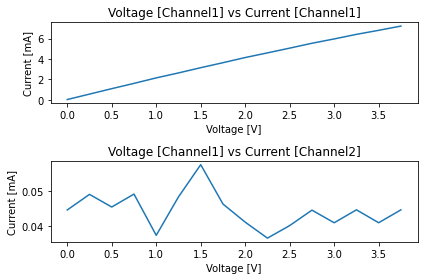

In [3]:
#Preset and hold
q.v[K] = start
q.v[1] = 0

#print("Current 1: " + str(q.i[1]))

#Set current for channel K
#q.i[K] = I

# Performing a Voltage sweep
#for voltage_sweep in range(start, stop, step):
for voltage_sweep in np.arange(start, stop, step):
    q.v[K] = float(voltage_sweep)
    time.sleep(0.2)
    averaged_voltage = 0
    averaged_current = 0
    averaged_voltage_second_channel = 0
    # Performing multiple measurements
    for counter in range(samples):
        measured_voltage = q.v[K]
        measured_current = q.i[K]
        measured_current_second_channel = q.i[K2]
        time_ = time.time_ns()
        averaged_voltage += measured_voltage
        averaged_current += measured_current    
        averaged_current_second_channel += measured_current_second_channel
        #measured_voltage_second_channel = q.v[2]
        #averaged_voltage_second_channel += measured_voltage_second_channel

    # Averaging the measurements and file logging
    averaged_voltage /= samples
    averaged_current /= samples
    if(averaged_current):
        derived_resistance = (averaged_voltage/averaged_current)*1000
    else:
        derived_resistance = 0
    #averaged_voltage_second_channel /= samples
    averaged_current_second_channel /= samples
    averaged_voltage_list.append(averaged_voltage)
    averaged_current_list.append(averaged_current)
    derived_resistance_list.append(derived_resistance)
    averaged_current_second_channel_list.append(averaged_current_second_channel)
    #averaged_voltage_second_channel_list.append(averaged_voltage_second_channel)
    meas_file.write('{:+010.6f}\t{:+010.6f}\t{:+010.6f}\n' .format(averaged_voltage,  averaged_current, averaged_current_second_channel))
    os.system('clear')  # or cls
    print('Percentuale di completamento: ' + str(math.trunc(((voltage_sweep-start)/(stop-start))*100)) + " %")

# Video Debugging    
print("Channel {:} set to {:} V, measured {:} V and {:} mA\n".format(K, voltage_sweep, averaged_voltage, averaged_current))
print("The derived resistance is: {:} Ohm\n".format(derived_resistance))
print("Voltage list: \n", averaged_voltage_list)
print("Current list: \n", averaged_current_list)
print("Current second channel list: \n", averaged_current_second_channel_list)

# Plot results
print("Inizio dei plot")
fig, axs = plt.subplots(2)
axs[0].plot(averaged_voltage_list, averaged_current_list)
axs[0].set_title('Voltage [Channel' + str(K) + '] vs Current [Channel' + str(K) +']')
axs[0].set_xlabel('Voltage [V]')
axs[0].set_ylabel('Current [mA]')
axs[1].plot(averaged_voltage_list, averaged_current_second_channel_list)
axs[1].set_title('Voltage [Channel' + str(K) + '] vs Current [Channel' + str(2) +']')
axs[1].set_xlabel('Voltage [V]')
axs[1].set_ylabel('Current [mA]')
plt.tight_layout()
plt.savefig('Channel_' + str(K) + '_sweep_' + str(start) + '-' + str(stop) + '_step_' + str(step) + '.png')

print("Fine dei plot")


# Close the log file
meas_file.close()

# Set all channels to zero
q.v[:] = 0
#q.i[:] = 0

# Close the communication with the driver
q.close()
print("Programma terminato")